# 图像光照效果算法

In [33]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [34]:
src = cv2.cvtColor(cv2.imread('../datas/sunset.jpg'),cv2.COLOR_BGR2RGB)

In [35]:
def sunlight_effect(src,x,y,threshold):
    rgb = np.float64(src)
    rows,cols = rgb.shape[0],rgb.shape[1]
    dst = np.zeros_like(rgb)
    center_x = x
    center_y = y
    if x >= cols or y >= rows or x < 0 or y < 0:
        center_x = rows // 2
        center_y = cols // 2
    r = min(center_x,center_y)
    cur_r = 0
    pixel_value = 0
    for i in range(rows):
        for j in range(cols):
            pixel = rgb[i,j]
            curR = np.sqrt((i - center_x) ** 2 + (j - center_y) ** 2)
            if cur_r <= r:
                pixel_value = threshold * (1 - cur_r / (r + 1.0e-5))
                pixel = pixel + pixel_value
                dst[i,j] = pixel
            else:
                dst[i,j] = pixel
                
    dst[dst < 0] = 0
    dst[dst > 255] = 255
    
    return cv2.convertScaleAbs(dst)
                

In [44]:
dst = sunlight_effect(src,200,600,128)

Text(0.5,1,'Sun Light')

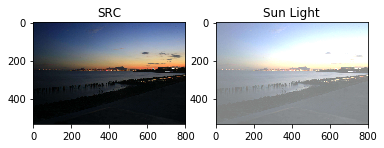

In [46]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Sun Light')


参考：

[1]. https://blog.csdn.net/trent1985/article/details/45057621